In [2]:
##1
## Importing Modules

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm #just to get the progress bar 
import random
warnings.filterwarnings('ignore')

%matplotlib inline

import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D ,Dropout, Flatten, MaxPooling2D, Input


In [3]:
##2 (CHANGER LA DIRECTORY)
## Load Dataset

BASE_DIR=r"C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset"

In [7]:
##3
#labels: race, gender, ethnicity


image_paths=[]
age_labels=[]
gender_labels=[]


for filename in tqdm(os.listdir(BASE_DIR)): #iterates in all the files inside the direcetory
    image_path=os.path.join(BASE_DIR,filename)
    temp=filename.split('_') #on split le nom de l'image selon les _ pour avoir age , date etc..
    if len(temp) >= 3 and all(p.isdigit() for p in temp[:3]):
        age =int(temp[0])#premier element de la liste
        gender =int(temp[1])#second element de la liste
        image_paths.append(image_path)
        age_labels.append(age)
        gender_labels.append(gender)
    else:
        print(f"Skipping file with unexpected format: {filename}")
    #la barre en bas montre que we loaded all the images 
    

  0%|          | 0/24103 [00:00<?, ?it/s]

In [5]:
##4
#convert my images into a data frame
df=pd.DataFrame()
df['image_path'],df['age'],df['gender']=image_paths, age_labels, gender_labels # ce sont les colonnes de mon dataframe
df.sample(10) #cette commande nous permet de voir 10 lignes aléatoire, on a creer a proper dataframe


image_path  age  gender
19914  C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset...   56       1
13180  C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset...   35       0
17744  C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset...   49       0
8060   C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset...   26       1
13360  C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset...   35       0
1489   C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset...   18       1
17411  C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset...   47       0
21920  C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset...   68       1
6467   C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset...   26       0
6666   C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset...   26       0

In [6]:
##5
#define labels of gender
gender_dict={0:'Male',1:'Female'}

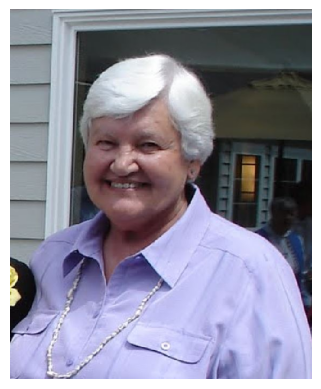

In [7]:
##6
# Exploratory Data Analysis
from PIL import Image  # PIL est un module utilise pour loader des images 
img= Image.open(df['image_path'][random.randint(0, len(df) - 1)]) #on ouvre juste une image aléatoire
plt.axis('off')
plt.imshow(img);
#for better image preproceessing et ne pas surcharge la RAM, La RAM EST LIMITE on utilise grayscale et on la reesize

In [8]:
##10
## Extracting features
from tensorflow.keras.preprocessing.image import load_img

def extract_features(images):
    features=[]
    for image in tqdm (images):
         #on ne peux pas  se permettre de load toutes les images en RGB: 3 dimensions  et prendre toute la memoire
        img = load_img(image)
        #img = load_img(image, color_mode='grayscale')
        img=img.resize((128,128),Image.ANTIALIAS)
        img=np.array(img)
        features.append(img)
        
    #we convert the features to a numpy array
    features=np.array(features) # cette etape est obligatoire car les neurals network gere que les array 
    features=features.reshape(len(features),128,128,3) #ca prend en arguments number fo features, width, height et la dimension
    # dans notre cas grayscale image ducoup dimension=1
    #dans le cas ou on sera rester en RGB, on oublie ceci 
    return features 
    
        

In [8]:
##11
X=extract_features(df['image_path'])

  0%|          | 0/24104 [00:00<?, ?it/s]

In [9]:
##12
X.shape
#on verifie bien que la dernier valeur est 1 cad il est en graycale

(24104, 128, 128, 3)

In [10]:
##13
#normalize the images 
X=X/255.0 #la valeur dee la pixel est de 0-255 maintenant  elle sera de la range 0 to 1 

In [11]:
##14
y_gender=np.array(df['gender']) #on convertit to numpy
y_age=np.array(df['age']) #on convertir to numpy 

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

# Définir la taille des batchs
batch_size = 32
valid_batch_size = 32

# Définir la forme d'entrée (exemple)
input_shape = (128, 128, 3)

# Définir le modèle séquentiel
model_age = Sequential()

# Ajouter les couches convolutionnelles et de pooling
model_age.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model_age.add(MaxPooling2D(pool_size=(2, 2)))

model_age.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_age.add(MaxPooling2D(pool_size=(2, 2)))

# Ajouter une couche Flatten pour aplatir les données
model_age.add(Flatten())

# Ajouter les couches entièrement connectées avec Dropout
model_age.add(Dense(128, activation='relu'))
model_age.add(Dropout(0.3))

# Ajouter la couche de sortie pour la prédiction de l'âge
model_age.add(Dense(1, activation='linear'))  # Utiliser 'linear' pour une sortie de régression

# Compiler le modèle
model_age.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

# Définir le callback pour sauvegarder le modèle complet
checkpoint_callback = ModelCheckpoint(
    filepath='AgePersonelModel.keras',
    monitor='val_mae',
    save_best_only=True,
    save_weights_only=False,
    mode='min',  # 'min' car nous voulons minimiser 'val_mae'
    verbose=1
)

# Entraîner le modèle
history = model_age.fit(
    x=X, 
    y=y_age, 
    epochs=50, 
    batch_size=batch_size, 
    validation_split=0.2, 
    callbacks=[checkpoint_callback]
)




Epoch 1/50
603/603 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - loss: 220.9840 - mae: 11.4738
Epoch 1: val_mae improved from inf to 34.15331, saving model to AgePersonelModel.keras
603/603 ━━━━━━━━━━━━━━━━━━━━ 178s 281ms/step - loss: 220.9235 - mae: 11.4722 - val_loss: 1375.4563 - val_mae: 34.1533
Epoch 2/50
603/603 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - loss: 158.3382 - mae: 9.7010
Epoch 2: val_mae improved from 34.15331 to 33.90728, saving model to AgePersonelModel.keras
603/603 ━━━━━━━━━━━━━━━━━━━━ 161s 268ms/step - loss: 158.3349 - mae: 9.7009 - val_loss: 1374.8130 - val_mae: 33.9073
Epoch 3/50
603/603 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step - loss: 140.3229 - mae: 9.2068
Epoch 3: val_mae improved from 33.90728 to 32.18652, saving model to AgePersonelModel.keras
603/603 ━━━━━━━━━━━━━━━━━━━━ 152s 252ms/step - loss: 140.3259 - mae: 9.2069 - val_loss: 1213.1670 - val_mae: 32.1865
Epoch 4/50
603/603 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - loss: 129.0151 - mae: 8.7628
Epoch 4: val_mae did not improve fro

KeyboardInterrupt: 

NameError: name 'history' is not defined

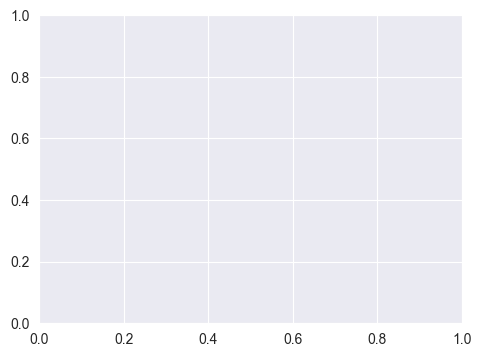

In [13]:
# Plotting the training history for loss and MAE
plt.figure(figsize=(12, 4))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# MAE plot
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

In [9]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Charger le modèle sauvegardé
model = load_model('AgePersonelModel.keras') 

# Préparer les nouvelles données pour la prédiction

# IL FAUT RUN LES CODES AU DEBUT JUSQU'AU NUMERO 10
random_image_paths = df['image_path'].sample(n=25, random_state=12).tolist()

# Remplacez ceci par vos propres données à prédire
X_new = extract_features(random_image_paths)  # Par exemple, un NumPy array avec les mêmes dimensions que les données d'entraînement

# Faire des prédictions
predictions = model.predict(X_new)

# Afficher les résultats
print(predictions)


  0%|          | 0/25 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
[[ 142.8785 ]
 [2313.4985 ]
 [2867.176  ]
 [1815.619  ]
 [ 743.9404 ]
 [-194.73961]
 [2321.8528 ]
 [1998.7612 ]
 [3359.3723 ]
 [2059.1472 ]
 [1473.925  ]
 [1372.8278 ]
 [2211.3164 ]
 [3193.6365 ]
 [1268.2833 ]
 [ 937.5669 ]
 [3232.3293 ]
 [2558.6558 ]
 [1054.8502 ]
 [2855.6433 ]
 [3100.0413 ]
 [ 150.34538]
 [2635.7139 ]
 [1621.7523 ]
 [1465.3188 ]]


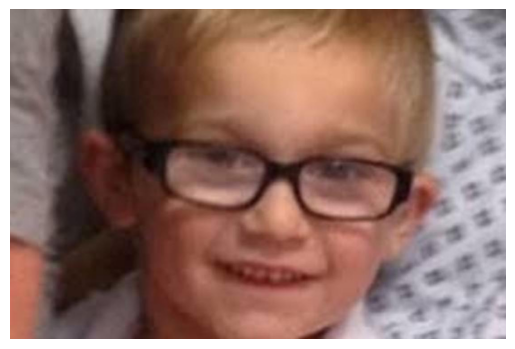

C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset\3_0_0_20170114033153529.jpg


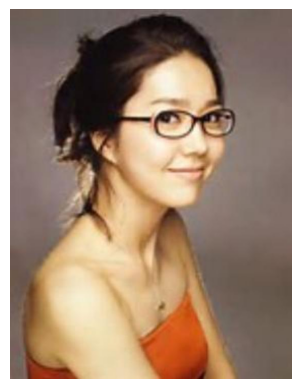

C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset\25_1_2_20170116175242392.jpg


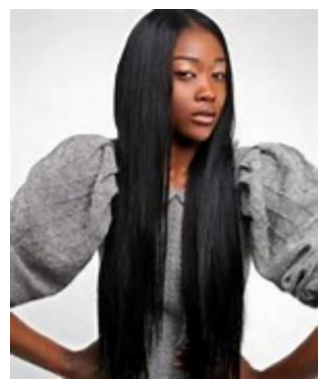

C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset\26_1_1_20170113001606417.jpg


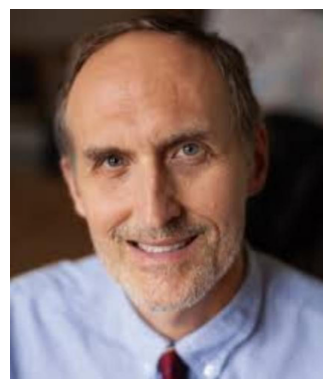

C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset\42_0_0_20170117154810113.jpg


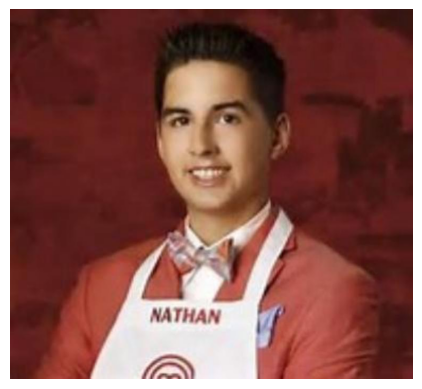

C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset\20_0_0_20170117134042772.jpg


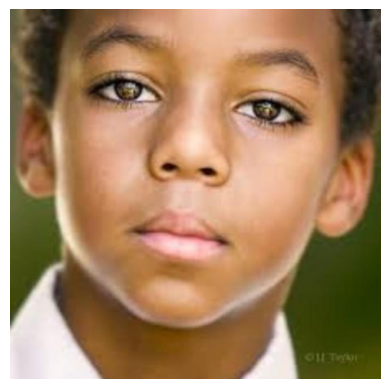

C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset\8_1_1_20170117135414790.jpg


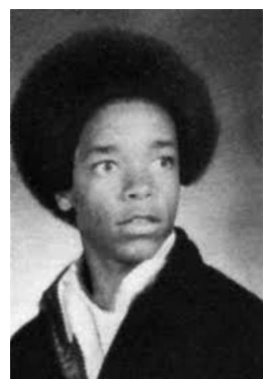

C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset\16_0_1_20170116200802213.jpg


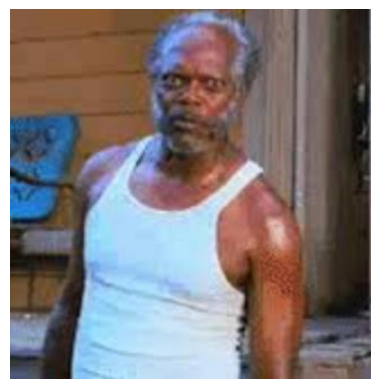

C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset\76_0_1_20170116205605555.jpg


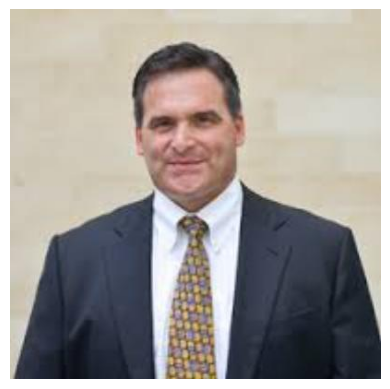

C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset\47_0_0_20170105173254709.jpg


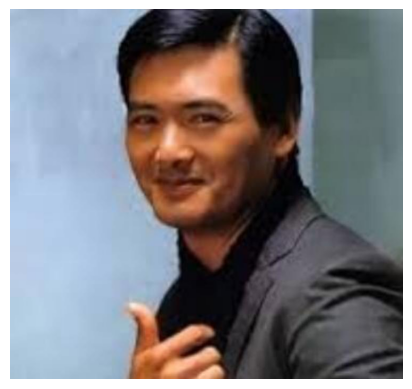

C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset\32_0_2_20170116191422270.jpg


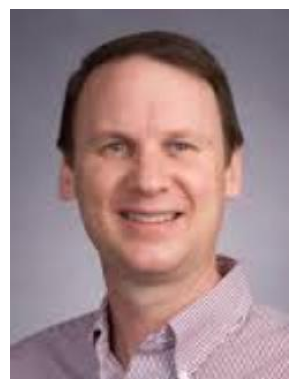

C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset\39_0_0_20170105172508901.jpg


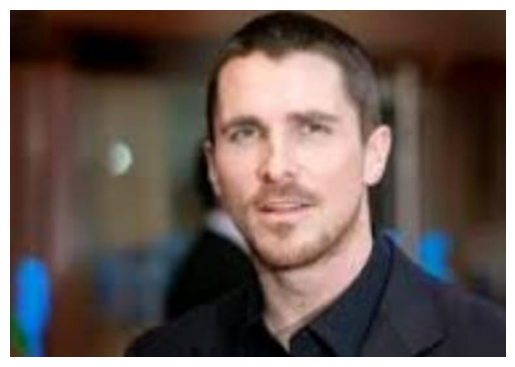

C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset\30_0_0_20170117181257163.jpg


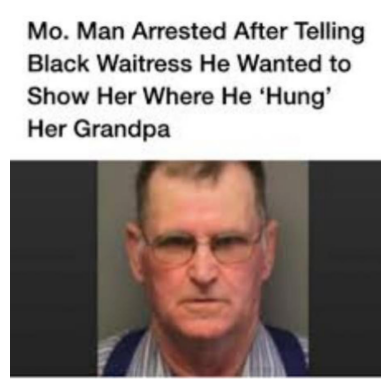

C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset\58_1_0_20170117154253562.jpg


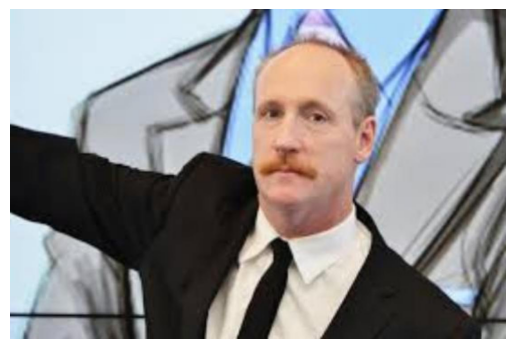

C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset\48_0_0_20170117131143074.jpg


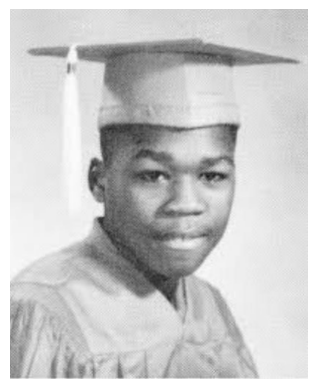

C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset\24_0_1_20170117134924378.jpg


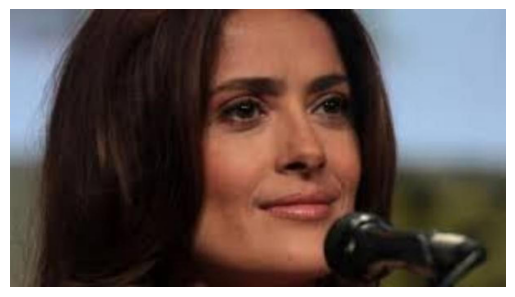

C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset\30_1_4_20170117203009657.jpg


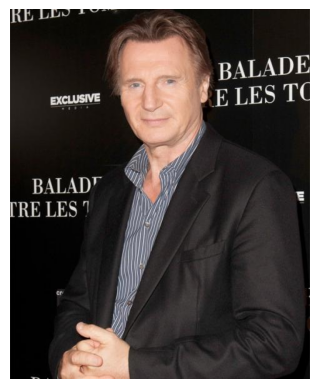

C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset\62_0_0_20170111171747583.jpg


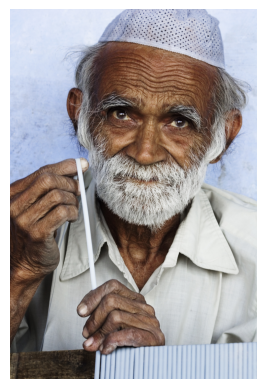

C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset\90_0_3_20170111210252274.jpg


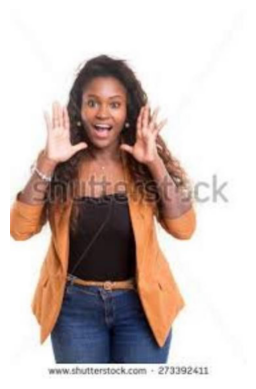

C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset\32_1_1_20170112210500948.jpg


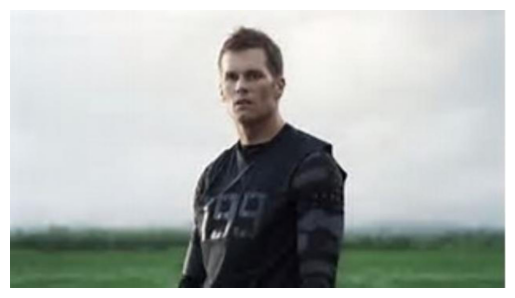

C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset\26_0_0_20170116193305807.jpg


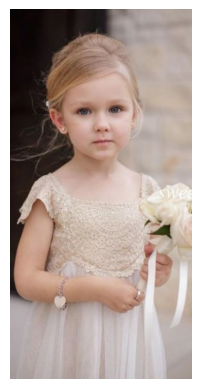

C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset\7_1_0_20170109204800702.jpg


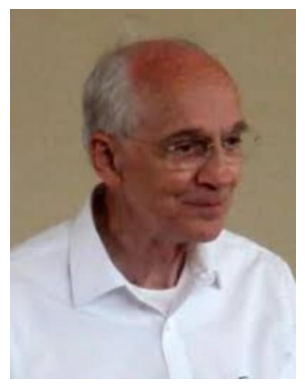

C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset\75_0_3_20170117173638390.jpg


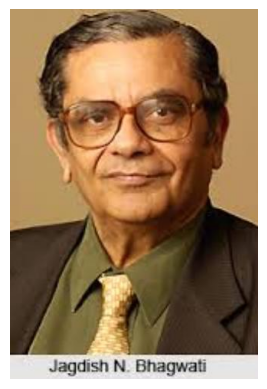

C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset\72_0_3_20170109150847004.jpg


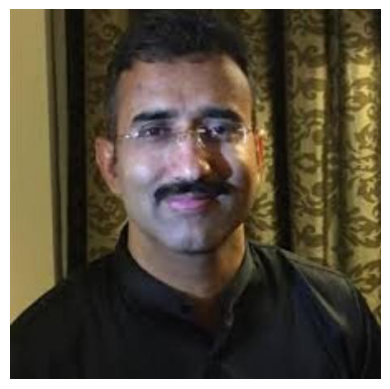

C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset\30_0_3_20170119195800379.jpg


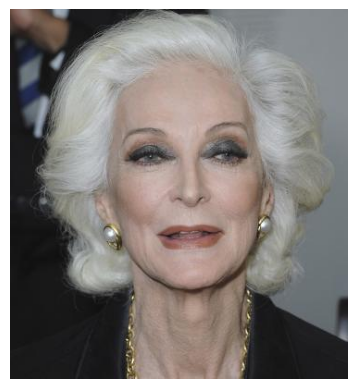

C:\Users\Gabriel\Documents\Inge-2I\UTK_Dataset\80_1_0_20170110140948978.jpg


In [10]:
from PIL import Image

for img_path in random_image_paths:
    img = Image.open(img_path)
    plt.figure()
    plt.axis('off')
    plt.imshow(img)
    plt.show()
    print(img_path)
